# Quick start
This notebook is for a quick start to plot basic result from the [G50 fabric analyser](http://www.russellheadinstruments.com/files/G50%20brochure%2009Jan08%20rev1.pdf).

In [1]:
import xarrayaita.loadData_aita as lda #here are some function to build xarrayaita structure
import xarrayaita.aita as xa
import xarrayuvecs.uvecs as xu
import xarrayuvecs.lut2d as lut2d

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

## Load your data

In [2]:
# path to data and microstructure
path_data='orientation_test.dat'
path_micro='micro_test.bmp'

In [3]:
data=lda.aita5col(path_data,path_micro)

In [4]:
data

<xarray.Dataset>
Dimensions:      (v: 2, x: 1000, y: 2500)
Coordinates:
  * x            (x) float64 0.0 0.02 0.04 0.06 0.08 ... 19.92 19.94 19.96 19.98
  * y            (y) float64 49.98 49.96 49.94 49.92 49.9 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: v
Data variables:
    orientation  (y, x, v) float64 2.395 0.6451 5.377 ... 0.6395 0.6098 0.6473
    quality      (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 96 97 97 96
    micro        (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId      (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1

With [G50 fabric analyser](http://www.russellheadinstruments.com/files/G50%20brochure%2009Jan08%20rev1.pdf) we usually filter the value with a `quality` below $75$.

In [5]:
data.aita.filter(75)

## Plot colormap
Plotting a colormap using a color wheel is done using `xarrayuvecs`

### Full colorwheel

In [6]:
data['FullColormap']=data.orientation.uvecs.calc_colormap()

Therfore the `FullColormap` variable is store in the `xarray.Dataset`

In [7]:
data

<xarray.Dataset>
Dimensions:       (img: 3, v: 2, x: 1000, y: 2500)
Coordinates:
  * x             (x) float64 0.0 0.02 0.04 0.06 ... 19.92 19.94 19.96 19.98
  * y             (y) float64 49.98 49.96 49.94 49.92 ... 0.06 0.04 0.02 0.0
Dimensions without coordinates: img, v
Data variables:
    orientation   (y, x, v) float64 nan nan 5.377 1.05 ... 0.6395 0.6098 0.6473
    quality       (y, x) int64 0 90 92 93 92 92 94 94 ... 96 96 96 96 97 97 96
    micro         (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    grainId       (y, x) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    FullColormap  (y, x, img) float64 255.0 255.0 255.0 0.0 ... 0.0 0.425 0.1756

The plot can be done using :

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

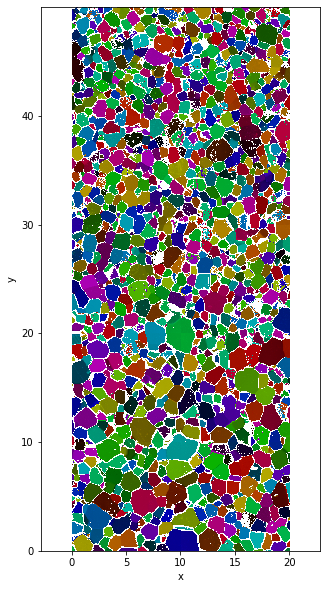

In [8]:
plt.figure(figsize=(5,10))
data.FullColormap.plot.imshow()
plt.axis('equal')

The associated colorwheel can be plot using :

In [9]:
lut_f=lut2d.lut()

Text(0.5, 1.0, 'Full colorwheel')

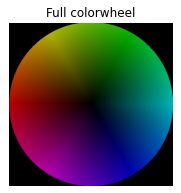

In [10]:
plt.figure(figsize=(3,3))
plt.imshow(lut_f)
plt.axis('equal')
plt.axis('off')
plt.title('Full colorwheel')

### Semi colorwheel
The same figure can be done using a "semi" colorwheel.

In [11]:
data['SemiColormap']=data.orientation.uvecs.calc_colormap(semi=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.01, 19.990000000000002, -0.010000000000001563, 49.99000000000001)

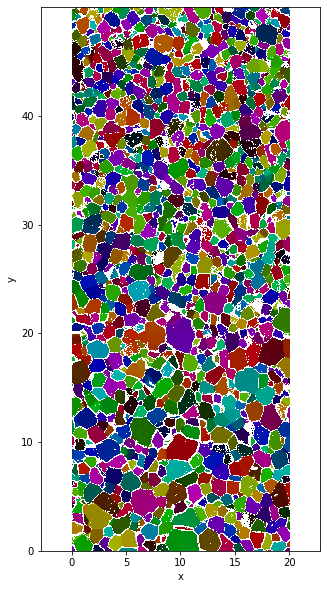

In [12]:
plt.figure(figsize=(5,10))
data.SemiColormap.plot.imshow()
plt.axis('equal')

Text(0.5, 1.0, 'Semi colorwheel')

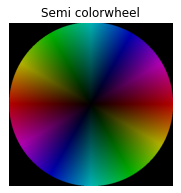

In [13]:
lut_s=lut2d.lut(semi=True)
plt.figure(figsize=(3,3))
plt.imshow(lut_s)
plt.axis('equal')
plt.axis('off')
plt.title('Semi colorwheel')

## Plot ODF
ODF stand for Orientation Density Function. It is a probability density function for orientation. Therefore it's integral over the sphere is equal to 1.

```{warning}
The `plotODF function` is very quite sensible to the `bw` input parameter that is the bandwidth of kernel for the kde estimation. See documentation here (Need to document this in xarrayuvecs)
```

### The ODF

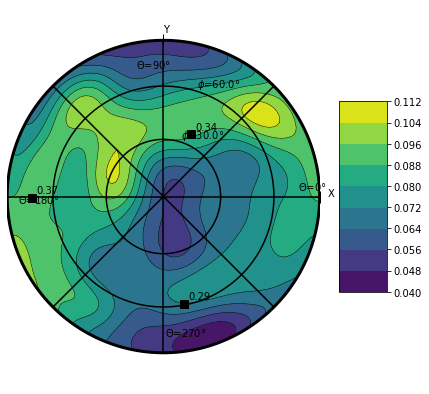

In [14]:
plt.figure(figsize=(7,7))
data.orientation.uvecs.plotODF(bw=0.2,cmap=cm.viridis)

### The 2nd order orientation tensor

The second order orientation tensor of a set of $x_i$ vector is defnied by :

$OT2nd=\frac{1}{N}\sum_{i=1}^{N}x_i \otimes x_i$

There for you can extract the eigen value and eigen vector of it. It is what `xu.uvec.OT2nd` does.

In [15]:
e_val,e_vec=data.orientation.uvecs.OT2nd()
print('The 1st eigen value is :',e_val[0],'. Associated with the vector :',e_vec[:,0] )
print('The 2nd eigen value is :',e_val[1],'. Associated with the vector :',e_vec[:,1] )
print('The 3rd eigen value is :',e_val[2],'. Associated with the vector :',e_vec[:,2] )

The 1st eigen value is : 0.36842623 . Associated with the vector : [ 0.95692456  0.00752591 -0.29023907]
The 2nd eigen value is : 0.3406706 . Associated with the vector : [0.24083522 0.5377383  0.8079826 ]
The 3rd eigen value is : 0.2909032 . Associated with the vector : [-0.16215347  0.8430782  -0.5127625 ]


## Work on subset

### Only on grain

In [16]:
gId=100

In [17]:
ds=data.where(data.grainId==gId,drop=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Orientation full')

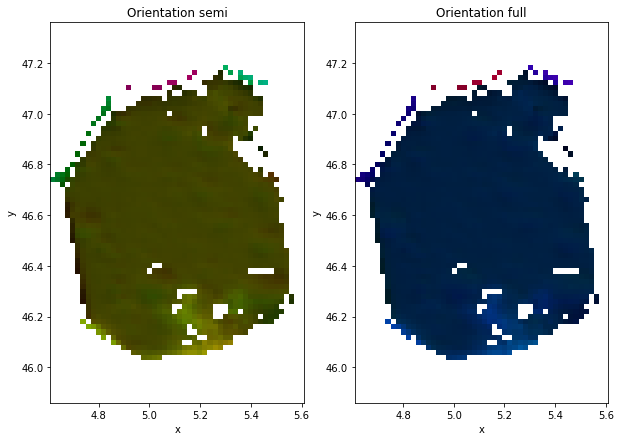

In [18]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
ds.SemiColormap.plot.imshow()
plt.axis('equal')
plt.title('Orientation semi')
plt.subplot(1,2,2)
ds.FullColormap.plot.imshow()
plt.axis('equal')
plt.title('Orientation full')

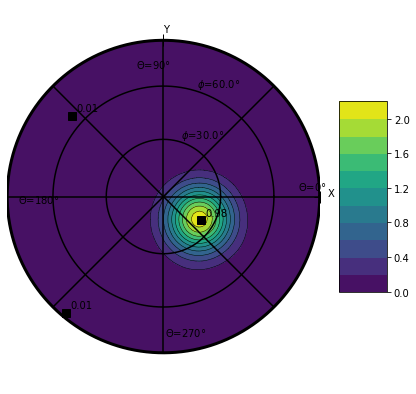

In [19]:
plt.figure(figsize=(7,7))
ds.orientation.uvecs.plotODF(nbr=100)

### More grains

In [20]:
ds2=data.where((data.grainId==4)+(data.grainId==5),drop=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Orientation full')

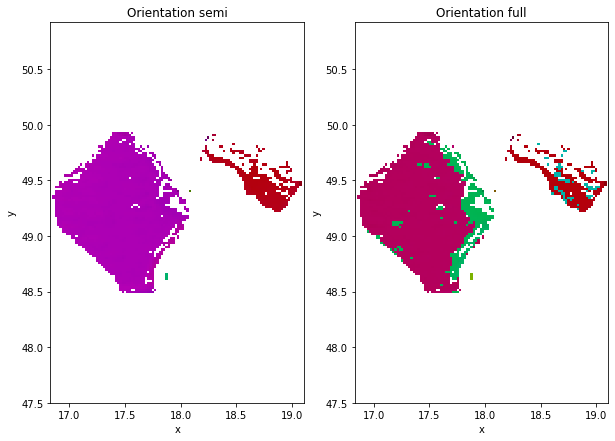

In [21]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
ds2.SemiColormap.plot.imshow()
plt.axis('equal')

plt.title('Orientation semi')
plt.subplot(1,2,2)
ds2.FullColormap.plot.imshow()
plt.axis('equal')

plt.title('Orientation full')